`machine learning course 2025 (с) mssvctr`

### Домашнее задание 1

**Titanic challenge** - самое известное соревнование по Data Science

Используйте данные о пассажирах Титаника, чтобы построить свой классификатор, который предсказывает вероятность гибели пассажира на печально известном корабле

#### Шаг 1: импорт библиотек

Заполните плейсхолдеры

In [1]:
# импортируйте pandas, numpy, seaborn и matplotlib
# не забывайте о том, что каждая из этих библиотек
# использует свои сокращения

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# далее мы импортируем миллион методов из scikit-learn
# эта часть уже выполнена, ура!

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Шаг 2: загружаем данные с Титаника

In [2]:
# выгрузим датасет напрямую с URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# выведите первые 5 строк датасета
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Шаг 3: анализ данных

Опишите данные и укажите в комментариях к коду ответы на вопросы:

1. выведите df.info()
  - в каких столбцах есть NaN'ы?
  - ориентируясь на количество NaN'ов в столбцах, определите, какие строки "не жалко" выбросить, а какие лучше сохранить
2. визуализируйте распределение классов по столбцу `Survived`
  - сбалансировали ли классы в нашем датасете?
3. выведите список столбцов, в которых представлены категориальные данные
  - почему категориальные данные нужно будет обработать перед запуском обучения модели?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C123,S
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,NaN,S


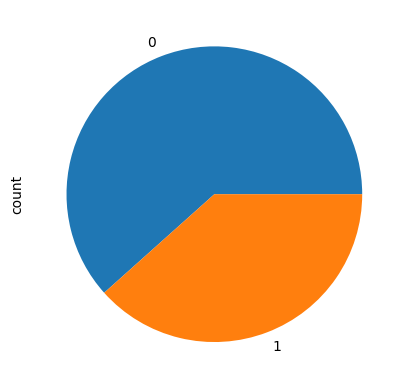

In [3]:
df.info()
# Nanы в Age, Cabin, Embarked #
# Age -- это важная информация, в Cabin слишком много пропусков, чтобы оставлять. А Embarked мы просто так выбросим :) #

plt.figure()
df['Survived'].value_counts().plot.pie()
# смотрим, какое распределение, и мастерим диаграмму #
# классы не сбалансированы :( #
df[['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']].head(5)
# категориальные данные -- это те, которые могут принимать ограниченное число значений и часто лежат в нечисловом виде. модельке будет сложно с ними работать --> либо перевести их в удобный формат, либо убрать #

#### Шаг 4: анализ данных

Ответы на эти вопросы помогут вам принять решения для препроцессинга данных:

- требуется ли балансировка классов?
- какие столбцы нужно дропнуть?
- какие данные нужно преобразовать к виду числовых?

**Дропаем столбцы**

Оставим классы в покое и сразу перейдем к очистке таблицы

Есть два пути:

- дропнуть "лишние" столбцы из исходной таблицы
- создать новую таблицу, в которую мы занесем только "нужные" столбцы

Выберите любой способ и создайте новый датафрейм, очищенный от неинформативных столбцов, в которых много NaN'ов

In [4]:
df_2 = df[['Survived', 'Pclass', 'Name', 'Sex']]
# создали новый датафрейм с полезными столбцами

In [5]:
df_2.head()

,Survived,Pclass,Name,Sex
0,0,3,"Braund, Mr. Owen Harris",male
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,1,3,"Heikkinen, Miss. Laina",female
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,0,3,"Allen, Mr. William Henry",male


**Categorical --> Numerical**

Для преобразования категориальных данных к виду чисел, в sklearn используется метод `LabelEncoder`

- документация [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

Метод автоматически заменяет категориальные метки на целые числа

In [6]:
# образец кодирования столбца 'Sex' с LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 0 = female, 1 = male
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# пробуем то же самое с маленькой таблицей
df_2['Sex'] = LabelEncoder().fit_transform(df_2['Sex'])  # 0 = female, 1 = male
df_2.head()

<ipython-input-7-c2d683dbb382>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Sex'] = LabelEncoder().fit_transform(df_2['Sex'])  # 0 = female, 1 = male


,Survived,Pclass,Name,Sex
0,0,3,"Braund, Mr. Owen Harris",1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
2,1,3,"Heikkinen, Miss. Laina",0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
4,0,3,"Allen, Mr. William Henry",1


Рассмотрим еще один метод: мы имитируем one-hot encoding с помощью метода `get_dummies` из Pandas

- [документация метода](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

Принцип работы one-hot-encoding:

- как мы закодируем цифры 1 и 9, чтобы получить разреженный массив?
- создаем матрицу из двух векторов размерностью 10
  ```
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] # цифра 1
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] # цифра 9
  ```
- единица означает позицию цифры в ряде `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`
- также:
  - единица означает `True` (число находится в этой позиции)
  - ноль означает `False` (число не находится в этой позиции)

При использовании этого метода в датафреймах, мы также создаем три новых столбца (три новых вектора), в которых помечаем `True` соответствие данной метке

In [8]:
# образец кодирования столбца 'Embarked' с get_dummies
# в Embarked у нас три метки: C, Q, S
# метки означают станцию посадки данного пассажира
df = pd.get_dummies(df, columns=['Embarked'])  # one-hot encoding
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,False,False,True


Теперь обновите ваш датафрейм: замените с использованием изученных методов категориальные данные на числовые

Изучите документацию и найдите дополнительные материалы, ответьте на вопрос: чем `LabelEncoder` отличается от `get_dummies` и когда какой метод лучше использовать?

In [9]:
# попробуем заменить категориальный "Survived" на числовой

df_2 = pd.get_dummies(df_2, columns=['Survived'])
df_2.head()

# получаем неудобные два столбика, где содержится ответ на каждый из вопросов ("Погиб?", "Выжил?")
# такая кодировка неудобна, если у нас только две метки. Таким образом, get_dummies лучше использовать при работе с несколькими метками (как мы делали с "Embarked")

,Pclass,Name,Sex,Survived_0,Survived_1
0,3,"Braund, Mr. Owen Harris",1,True,False
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,False,True
2,3,"Heikkinen, Miss. Laina",0,False,True
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,False,True
4,3,"Allen, Mr. William Henry",1,True,False


In [16]:
# преобразуем столбик "Survived" обратно и будем двигаться дальше
df_2['Survived_1'] = LabelEncoder().fit_transform(df_2['Survived_1'])
df_2 = df_2.drop(columns=['Survived_0'])
df_2.head()

,Pclass,Name,Sex,Survived_1
0,3,"Braund, Mr. Owen Harris",1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1
2,3,"Heikkinen, Miss. Laina",0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1
4,3,"Allen, Mr. William Henry",1,0


**Заполняем пропуски**

Мы убрали лишние столбцы, но NaN'ы по-прежнему есть в нашем датафрейме

Рассмотрим метод `SimpleImputer` из sklearn для заполнения пропусков в данных

- [документация SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [17]:
# заполняем пропуски в столбце Age
imputer = SimpleImputer(strategy="mean")
df['Age'] = imputer.fit_transform(df[['Age']])

Изучите документацию sklearn и ответьте на вопросы: какие стратегии доступы для работы с методом SimpleImputer? Чем они отличаются? Какие стратегии подойдут для работы с категориальными данными?

**Feature Engineering**

> Данные - это пища для вашей модели

Слишком шумные данные вызовут отравление модели (кстати, один из методов киберпреступности, построенный на работе с данными, так и называется - data poisoning!)

Недостаточность в данных может стать причиной недообучения (underfitting), поэтому мы можем не только дропать, но и добавлять фичи, т.е. признаки, на которых будет учиться наша модель

Этот процесс называется **feature engineering**

In [18]:
# Добавим фичу Family size = SibSp + Parch + 1 (единица обозначает самого пассажира)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Фича Alone для тех, кто путешествует один
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,True,False,False,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,False,True,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,False,False,True,1,1


Добавьте любую новую фичу в датафрейм, которая легко выводится из данных

Например, можно вытащить обращения к пассажирам из столбца `Name` из исходной таблицы: `Mr., Mrs., Dr.`

Для этого изучите внимательно данные, познакомьтесь с описанием датасета на Kaggle

- https://www.kaggle.com/c/titanic/

Вам нужно самостоятельно решить, что можно извлечь из этих данных, как назвать новую фичу и избавиться от категориальных меток

In [26]:
# делаем фичу "SES" (socio-economic class) и используем get_dummies
df_2['SES'] = df_2['Pclass']

df_2 = pd.get_dummies(df_2, columns=['SES'])
df_2.head()

,Pclass,Name,Sex,Survived_1,SES_1,SES_2,SES_3,SES_1,SES_2,SES_3
0,3,"Braund, Mr. Owen Harris",1,0,False,False,True,False,False,True
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,True,False,False,True,False,False
2,3,"Heikkinen, Miss. Laina",0,1,False,False,True,False,False,True
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,True,False,False,True,False,False
4,3,"Allen, Mr. William Henry",1,0,False,False,True,False,False,True


#### Шаг 4: обучение

Создаем пары `data - label`

In [46]:
X = df.drop(columns=['Survived', 'Name', 'Cabin']) # данные = все столбцы кроме метки Survived
y = df['Survived'] # метки = только столбец Survived

Вспомните прошлое занятие: примените метод `train_test_split`

Создайте 2 выборки данных в соотношении 80 на 20

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Изучите информацию о том, как работает логистическая регрессия и ответьте на вопрос: какую роль играет `StandardScaler` в работе с логистической регрессией?

In [ ]:
# StandartScaler выравнивает данные, делая датасет сбалансированным, а модель -- более стабильной и быстрой.

In [48]:
X_train.at[382, 'Ticket'] = 3101293

In [49]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
331,332,1,1,45.500000,0,0,113043,28.5000,False,False,True,1,1
733,734,2,1,23.000000,0,0,28425,13.0000,False,False,True,1,1
382,383,3,1,32.000000,0,0,3101293,7.9250,False,False,True,1,1
704,705,3,1,26.000000,1,0,350025,7.8542,False,False,True,2,0
813,814,3,0,6.000000,4,2,347082,31.2750,False,False,True,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,0,21.000000,0,0,343120,7.6500,False,False,True,1,1
270,271,1,1,29.699118,0,0,113798,31.0000,False,False,True,1,1
860,861,3,1,41.000000,2,0,350026,14.1083,False,False,True,3,0
435,436,1,0,14.000000,1,2,113760,120.0000,False,False,True,4,0


In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# На этом месте на меня начинают ругаться. Я уже дропнула все нечисловые столбцы, откуда вылезает ValueError: could not convert string to float: 'PC 17558'???
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'PC 17558'

Обучение, как и в случае работы с линейной регрессией, займет всего пару строк

Опишите основной принцип работы логистической регрессии своими словами (2-3 предложения достаточно)

Предварительно изучите материал: https://web.stanford.edu/~jurafsky/slp3/5.pdf

In [ ]:
# Логистическая регрессия предсказывает вероятность принадлежности объекта к классу. Логистическая функция оптимизирует веса признаков. На выходе мы получаем не просто класс, а вероятность!

In [23]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# предсказания
y_pred_log = log_reg.predict(X_test_scaled)

# вывод репорта
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

NameError: name 'X_train_scaled' is not defined

Повторим магию и обучим наивные байесовский классификатор. Что значит `Gaussian` в названии метода `GaussianNB`? Изучите документацию метода, чтобы ответить на этот вопрос

Почему для этого метода не нужен StandardScaler?

In [ ]:
# Gaussian "Gaussian" означает, что по этому методу признаки каждого класса распределены по нормальному (Гауссову) распределению. GaussianNB не требует StandardScaler, потому что Naive Bayes опирается на условные вероятности, а на веса (как в логистической регрессии).

In [24]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

ValueError: could not convert string to float: 'Partner, Mr. Austen'

Мы молодцы! Отрисуем результат с помощью матрицы ошибок

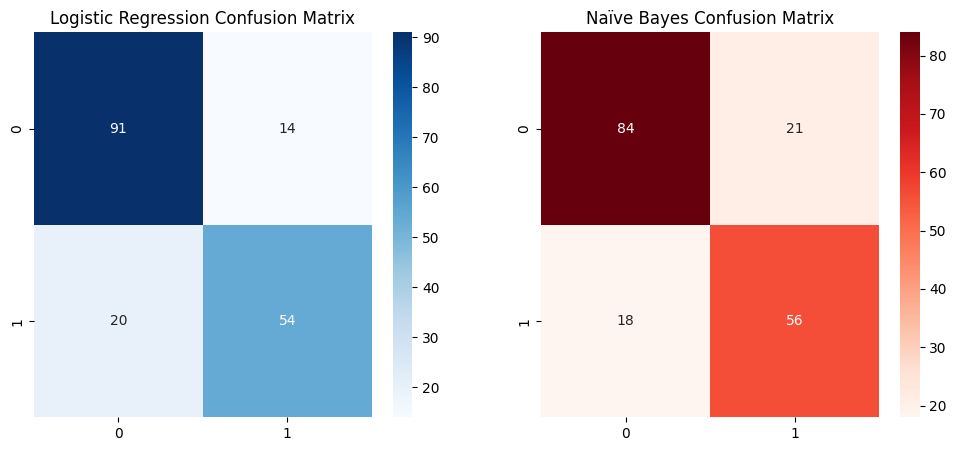

In [ ]:
conf_matrix_log = ### примените метод confusion_matrix для результатов логистической регрессии ###
conf_matrix_nb = ### примените метод confusion_matrix для результатов байесовского классификатора ###

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Reds", ax=axes[1])
axes[1].set_title("Naïve Bayes Confusion Matrix")

plt.show()